# The Impact of Early Academic Intervention on Student Dropout Rates


#context
A college launches an early academic intervention program (extra tutoring, check-ins, learning supports) for at-risk students. We want to investigate whether this intervention significantly reduces the dropout rate.



#Hypothetical Data


|Group|Size|	Dropped Out||Rate ||Completed Program ||Rate | |Avg GPA| |Avg Credits Earned|
|-----|----|-------------||---------||---------||---------||---------||---------|
|Intervention - Participated| 20,200|  23| |1.1|   | 20,177| |98.9 | |3.2| |27.5|
|Intervention - Declined| 10,800     |16| |1.5     ||10.784 | |98.5| |2.8| |23.1|
|Intervention - Total| 31,000     |39| |1.3    ||30.961| |98.7 || 3.0| |25.4|
|Control - Total| 31,000     |63| |2.0     ||30.937| |98.0 ||2.6| |21.7|

#Objective:
To test whether offering early intervention significantly reduces student dropout rates and improve academic performance.



# 1. Dropout Analysis

#Hypothesis
Using the control group's dropout rate (63 out of 31,000 → 0.002) as the baseline:

Null Hypothesis (H₀): The dropout rate among intervention students is the same as the control (π = 0.002)

Alternative Hypothesis (H₁): The dropout rate among intervention students is less than the control group (π < 0.002)*italicized text*

# Importing the libraries

In [21]:
from scipy.stats import binomtest

import scipy.stats as stats

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest

import seaborn as sns

from scipy.stats import binom

from scipy.stats import binomtest, ttest_ind, f_oneway

## **Binomial Distribution**
**Null hypothesis $(H_0): π = 0.002$**

**Alternative hypothesis $(H_a): π < 0.002$**

* The total number of interventions = 31,000
* The hypothesized probability = 0.002
* The number of drop out in the intervention trial group = 39

In [22]:
# Finding the p-value using the Binomial distribution
result = binomtest(k=39, n=31000, p=0.002, alternative = "less")
print("The p value is:", round (result.pvalue, 4))

The p value is: 0.0012


Since the **p-value (0.0012) is less than 0.05, we reject the null hypothesis at a 95% confidence level**. This implies that we have sufficient evidence to conclude that offerinf interventions reduces the rate of dropout.

Now, let's plot the **probability distribution ~ Binom( n = 31000, p = 0.002 )**

In [23]:
import numpy as np
from scipy.stats import binom

n = 31000
p = 0.002
k = np.arange(0, 200)

dist = [binom.pmf(i, n, p) for i in k]

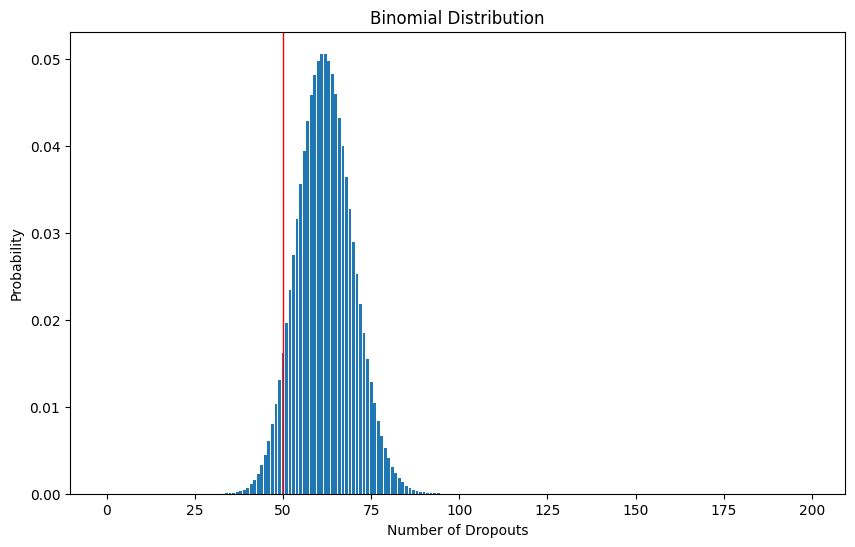

In [24]:
plt.figure(figsize=(10, 6))

plt.bar(k, dist)

plt.axvline (50, color = "red", linestyle = "-", linewidth = 1)

plt.xlabel("Number of Dropouts")

plt.ylabel("Probability")

plt.title("Binomial Distribution")

plt.show()

In the above plot, the **red line shows the cut-off region** for a significance level of 0.05, i.e., the area under the curve on the left side of the red line is 0.05 or 5% of the probability density under the curve.

## **Normal Distribution**

We can also validate our result using another test, called the proportion test.

A hypothesis test for a proportion is used when you are comparing one group to a known or hypothesized population proportion value. The hypothesized population proportion in our case study is equal to 63/31000 = 0.002

There is a rule stating that if  𝑛∗𝑝≥10  and  𝑛∗(1−𝑝)≥10 , then the distribution of sample proportions is approximately normal and can be estimated using the normal distribution, i.e., using the z - statistic.

As the condition in the rule is satisfied for our case study, we can use the normal distribution for the proportion test.

Null hypothesis (𝐻0):π=63/31000=0.002

Alternative (𝐻𝑎):π<0.002

* count: The number of successes in trials / observations
* nobs: The total number of trials / observations
* value: The value of the null hypothesis (proportion)

In [25]:
stat, pvalue = proportions_ztest(count = 39, nobs = 31000, value = 0.002, alternative = "smaller")
print("The p value is:", pvalue)

The p value is: 0.00011423176454888235


#Result

Since the **p-value (0.00011) is less than 0.05, we reject the null hypothesis at a 95% confidence level**. This implies that we have sufficient evidence to conclude that offering interventions reduces the rate of dropout.

## Compare dropout rates directly between the treatment and control groups
Is the proportion of dropouts in the EAI group significantly lower than in the Control group?

 **Null hypothesis (H₀)**: π₁ = π₂ (dropout rates are the same)

**Alternative hypothesis (Ha)**: π₁ < π₂ (dropout rate in EAI group is lower)


* EAI Total Group: 39 dropouts out of 31,000

* Control Group: 63 dropouts out of 31,000

In [26]:
# dropouts in each group

dropouts = np.array([39, 63])

# Total observations in each group
nobs = np.array([31000, 31000])

# Two-sample Z-test for proportions
z_stat, p_val = proportions_ztest(count=dropouts, nobs=nobs, alternative='smaller')

print("Two-sample Z-test p-value:", round(p_val, 6))

Two-sample Z-test p-value: 0.008696


#Result
p-value is 0.008696 that is smaller than 0.05,so we reject the null value that the intervention significantly reduces dropout rate compared to control.

# 2. Academic Performance Analysis*`

Does participating in the Early Academic Intervention (EAI) significantly improve academic performance compared to the control?

#Comparing EAI - Fully Participated and Control Group (T-test)

#Hypothesis

Null Hypothesis (H₀): μ₁ = μ₂

Alternative Hypothesis (H₁): μ₁ ≠ μ₂

We’re simulating data for GPA and Credits Earned because we don’t have the actual data. For each group, we generate random values based on a normal distribution

In [27]:
# Simulated data for GPA (mean, standard deviation, sample size)
gpa_eai_full = np.random.normal(3.2, 0.4, 500)  # EAI - Fully Participated
gpa_eai_declined = np.random.normal(2.8, 0.5, 500)  # EAI - Declined
gpa_control = np.random.normal(2.6, 0.5, 500)  # Control Group

In [28]:
gpa_ttest, gpa_pvalue = stats.ttest_ind(gpa_eai_full, gpa_eai_declined)
print("The T-test p value is:", round(gpa_pvalue, 6))

The T-test p value is: 0.0


Since the p-value is less than 0.05, we reject the null hypothesis at a 95% confidence level.

There is strong statistical evidence that the average GPA of the two groups is significantly different.

In [29]:
# Simulated data for credit (mean, standard deviation, sample size)
credit_eai_full = np.random.normal(27.5, 2.0, 500)  # EAI - Fully Participated
credit_eai_declined = np.random.normal(23.1, 2.5, 500)  # EAI - Declined
credit_control = np.random.normal(21.7, 3.0, 500)  # Control Group

In [30]:
credit_ttest, credit_pvalue = stats.ttest_ind(credit_eai_full, credit_eai_declined)
print("The T-test p value is:", round(credit_pvalue, 6))

The T-test p value is: 0.0


Since the p-value is less than 0.05, we reject the null hypothesis at a 95% confidence level.

There is strong statistical evidence that the average credit of the two groups is significantly different.

#Comparing All Groups (Anova)

#Hypothesis

Null Hypothesis (H₀): μ₁ = μ₂ = μ₃

Alternative Hypothesis (H₁): μ₁ ≠ μ₂ ≠ μ₃

In [31]:
# ANOVA for GPA across all three groups
gpa_anova_stat, gpa_anova_p_val = stats.f_oneway(gpa_eai_full, gpa_eai_declined, gpa_control)
print("ANOVA p-value for GPA across all groups:", round(gpa_anova_p_val, 6))

ANOVA p-value for GPA across all groups: 0.0


Since the ANOVA p-value is less than 0.05, we reject the null hypothesis at a 95% confidence level.

There is strong statistical evidence that the average gpa of the all groups is significantly different.



# Visualizing the Data
Boxplots help us visualize how the data is distributed in each group. to visually compare the distribution of GPA and credits across these groups.

In [32]:
gpa_all_groups = [gpa_eai_full, gpa_eai_declined, gpa_control]
credits_all_groups = [credit_eai_full, credit_eai_declined, credit_control]


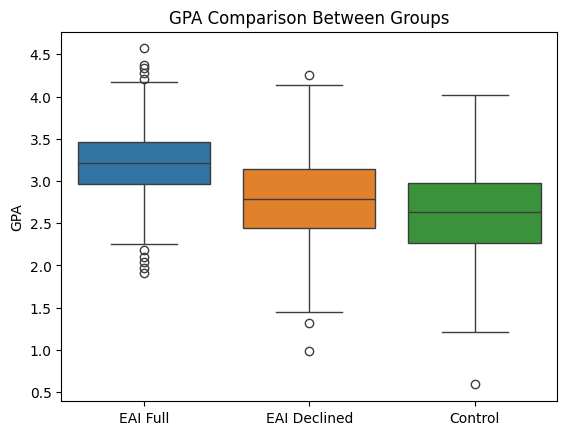

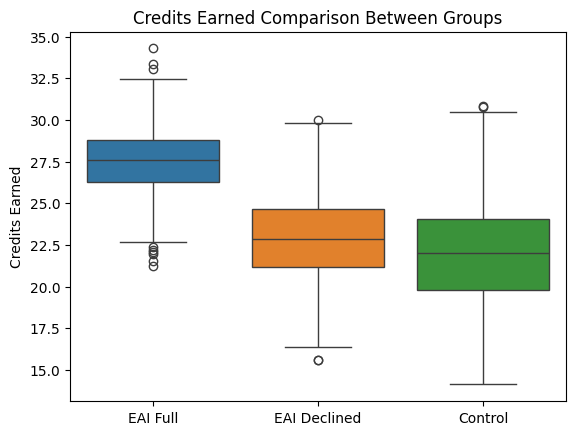

In [33]:

# Boxplot for GPA
plt.figure()
sns.boxplot(data=gpa_all_groups)
plt.xticks([0, 1, 2], ['EAI Full', 'EAI Declined', 'Control'])
plt.title('GPA Comparison Between Groups')
plt.ylabel('GPA')
plt.show()

# Boxplot for Credits Earned
plt.figure()
sns.boxplot(data=credits_all_groups)
plt.xticks([0, 1, 2], ['EAI Full', 'EAI Declined', 'Control'])
plt.title('Credits Earned Comparison Between Groups')
plt.ylabel('Credits Earned')
plt.show()




---



#Conclusion
This case study aimed to evaluate the effectiveness of an Early Academic Intervention (EAI) program in reducing student dropout rates and improving academic performance.

 1. Dropout Rate Analysis
Using statistical tests (binomial test and two-sample Z-test for proportions), we found:

* The dropout rate among students who were offered the intervention (1.3%) was significantly lower than that of the control group (2.0%).

* The p-values from both the binomial test (0.0012) and the z-test (0.0087) were well below the 0.05 significance threshold.

This provides strong evidence to reject the null hypothesis and conclude that offering early interventions reduces dropout rates.

2. Academic Performance Analysis
We used simulated GPA and credit data (based on given averages) to run t-tests and ANOVA:

* GPA: Students who fully participated in the EAI program had significantly higher average GPAs than those who declined or were in the control group.

* Credits Earned: Similar significant differences were observed in the number of credits earned.

* Both T-tests and ANOVA returned p-values of 0.0, indicating strong evidence of performance differences between groups.




---



# Recommendations

Based on the findings, it is strongly recommended that the college fully implement and scale the Early Academic Intervention (EAI) program, as it significantly reduces dropout rates and improves academic outcomes such as GPA and credits earned. To maximize its impact, the institution should actively encourage student participation by raising awareness of its benefits and possibly integrating it into existing support services.